In [ ]:
# !pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## LOAD DATA
data_dir = "../data/EDA/house-price-prediction/" 
train = pd.read_csv(data_dir+ "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [3]:
print(train.shape) # X,y
print(test.shape) # X, y->?

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.drop(['Id'], axis=1, inplace=True)
print(train.shape)

(1460, 80)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# we seggregate our categorical and numerical features
categorical_columns = train.select_dtypes(['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
numerical_columns = train.select_dtypes(['int64', 'float64']).columns
print(numerical_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [11]:
corr_matrix = train[numerical_columns].corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [12]:
corr_matrix.shape

(37, 37)

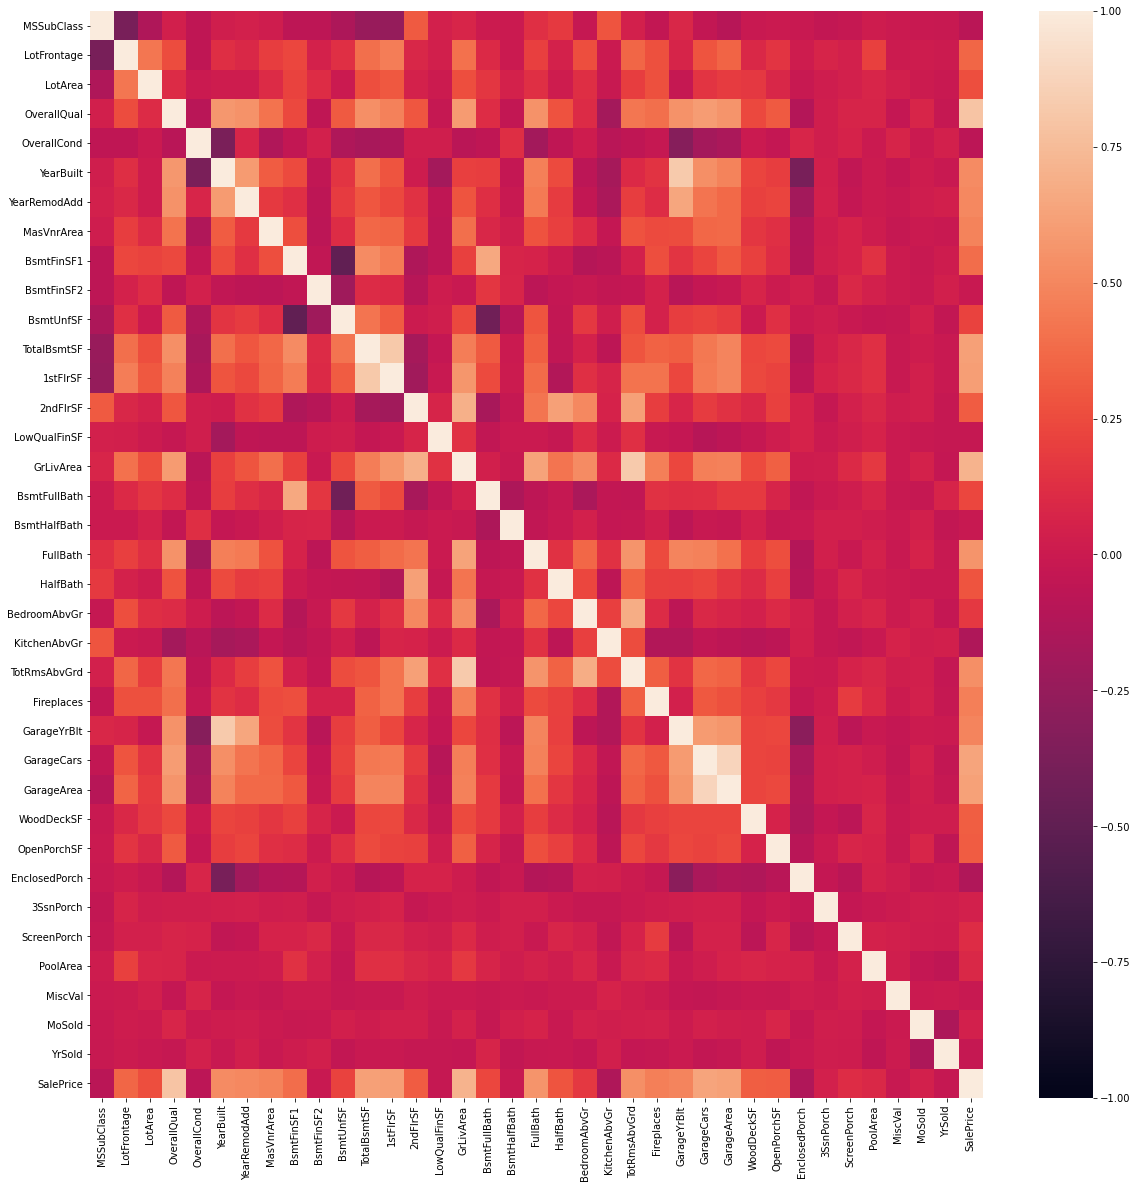

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=1, vmin=-1)
plt.show()

In [14]:
top_features = np.abs(corr_matrix).nlargest(11, columns=['SalePrice']).index # top 10 features

In [15]:
top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

## Visualization

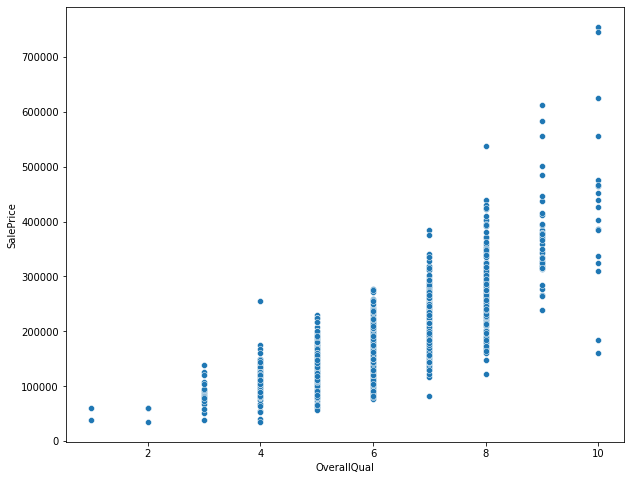

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')
# plt.scatter(train['OverallQual'], train['SalePrice'])
# plt.xlabel('OverallQual')
# plt.ylabel('SalePrice')
plt.show()

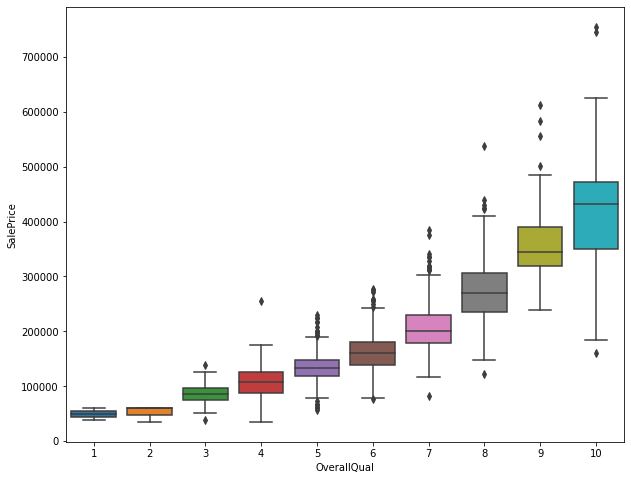

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=train, x='OverallQual', y='SalePrice')
plt.show()

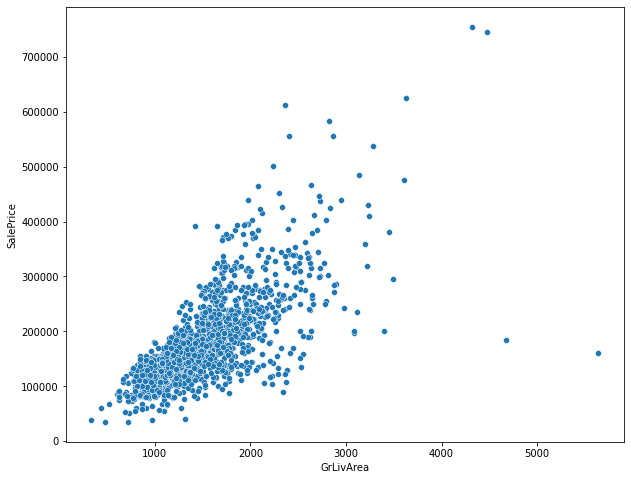

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x = 'GrLivArea', y='SalePrice')
plt.show()

In [23]:
train[train['GrLivArea']<4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


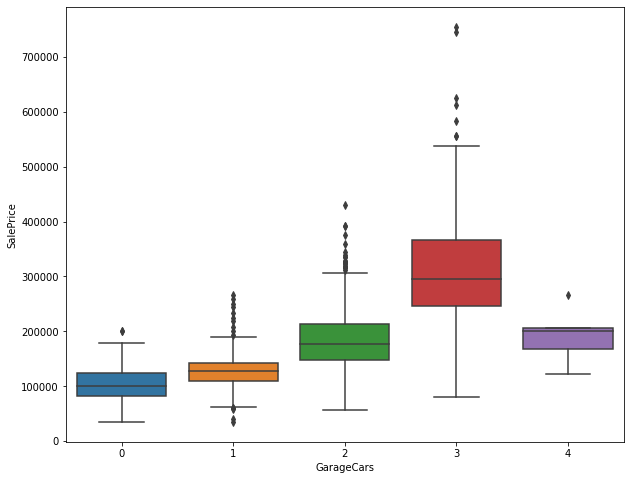

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train, x='GarageCars', y='SalePrice')
plt.show()

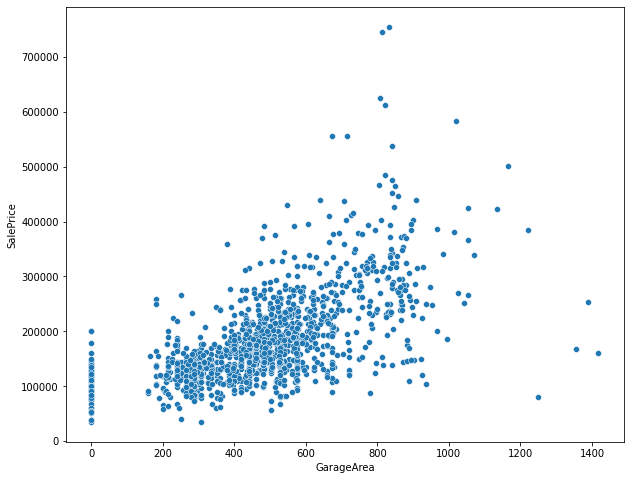

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x='GarageArea', y='SalePrice')
plt.show()

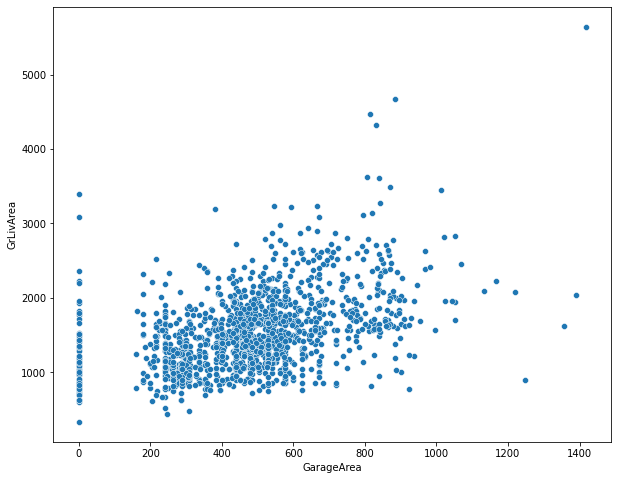

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x='GarageArea', y='GrLivArea')
plt.show()

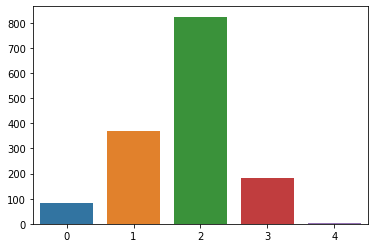

In [31]:
uni, count = np.unique(train['GarageCars'], return_counts=True) # bargraph
sns.barplot(x=uni, y=count)
plt.show()

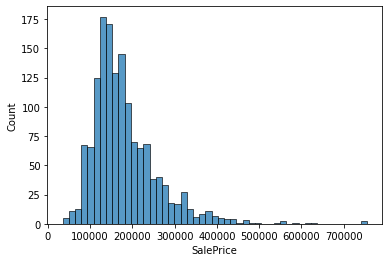

In [32]:
sns.histplot(data=train['SalePrice']) # cts var distribution -> histogram
plt.show()

## Imputation

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [37]:
uni, count = np.unique(train['Neighborhood'], return_counts=True)
print(len(uni))
{k:v for k,v in zip(uni, count)}

25


{'Blmngtn': 17,
 'Blueste': 2,
 'BrDale': 16,
 'BrkSide': 58,
 'ClearCr': 28,
 'CollgCr': 150,
 'Crawfor': 51,
 'Edwards': 100,
 'Gilbert': 79,
 'IDOTRR': 37,
 'MeadowV': 17,
 'Mitchel': 49,
 'NAmes': 225,
 'NPkVill': 9,
 'NWAmes': 73,
 'NoRidge': 41,
 'NridgHt': 77,
 'OldTown': 113,
 'SWISU': 25,
 'Sawyer': 74,
 'SawyerW': 59,
 'Somerst': 86,
 'StoneBr': 25,
 'Timber': 38,
 'Veenker': 11}

In [38]:
gb = train.groupby('Neighborhood')
type(gb)

pandas.core.groupby.generic.DataFrameGroupBy

In [47]:
gb.get_group('Blmngtn')['LotFrontage']

219     43.0
229     43.0
385     43.0
443     53.0
465      NaN
559      NaN
597     53.0
639     53.0
790     43.0
851      NaN
982     43.0
1004    43.0
1019    43.0
1023    43.0
1126    53.0
1394    53.0
1415    51.0
Name: LotFrontage, dtype: float64

In [49]:
def impute(grp):
    val = grp.mean()
    return grp.fillna(val)

impute(gb.get_group('Blmngtn')['LotFrontage'])
    

219     43.000000
229     43.000000
385     43.000000
443     53.000000
465     47.142857
559     47.142857
597     53.000000
639     53.000000
790     43.000000
851     47.142857
982     43.000000
1004    43.000000
1019    43.000000
1023    43.000000
1126    53.000000
1394    53.000000
1415    51.000000
Name: LotFrontage, dtype: float64

In [55]:
count = 0
def func(x):
    global count
    count += 1
    return x

print(count)
train['LotFrontage'].apply(func)
print(count)

0
1460


In [66]:
def impute(grp):
    val = grp.mean()
    return grp.fillna(val)

train['LotFrontage_imputed'] = gb['LotFrontage'].apply(impute)

In [69]:
np.sum(train['LotFrontage_imputed'].isna())

0

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1201 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   Street               1460 non-null   object 
 5   Alley                91 non-null     object 
 6   LotShape             1460 non-null   object 
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   object 
 11  Neighborhood         1460 non-null   object 
 12  Condition1           1460 non-null   object 
 13  Condition2           1460 non-null   object 
 14  BldgType             1460 non-null   object 
 15  HouseStyle           1460 non-null   o

## Feature Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### Label Encoding

In [73]:
# create object
le = LabelEncoder()

In [74]:
# train sample
le.fit_transform(['red', 'blue', 'green', 'red', 'blue', 'blue']) # blue, green, red -> 0, 1, 2

array([2, 0, 1, 2, 0, 0], dtype=int64)

In [75]:
# train sample
le.fit(['red', 'blue', 'green', 'red', 'blue', 'blue']) # only mapping has been learnt {blue:0, green:1, red:2}

LabelEncoder()

In [76]:
le.transform(['red', 'blue', 'green', 'red', 'blue', 'blue']) # returns the transformed/ encoded data

array([2, 0, 1, 2, 0, 0])

In [77]:
# test data
le.transform(['green', 'blue', 'blue'])

array([1, 0, 0])

### OneHot Encoding

In [90]:
ohe = OneHotEncoder(sparse=False)

In [91]:
colors = np.array(['red', 'blue', 'green', 'red', 'blue', 'blue']).reshape(-1,1)
print(colors)
ohe.fit(colors)

[['red']
 ['blue']
 ['green']
 ['red']
 ['blue']
 ['blue']]


OneHotEncoder(sparse=False)

In [92]:
ohe.transform(colors)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [96]:
ohe.categories

'auto'

In [101]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(train.loc[:,'Neighborhood':'Condition1'])

OneHotEncoder(sparse=False)

In [103]:
enc_data = ohe.transform(train.loc[:,'Neighborhood':'Condition1'])

In [104]:
enc_data.shape

(1460, 34)

In [105]:
ohe.get_feature_names()

array(['x0_Blmngtn', 'x0_Blueste', 'x0_BrDale', 'x0_BrkSide',
       'x0_ClearCr', 'x0_CollgCr', 'x0_Crawfor', 'x0_Edwards',
       'x0_Gilbert', 'x0_IDOTRR', 'x0_MeadowV', 'x0_Mitchel', 'x0_NAmes',
       'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge', 'x0_NridgHt',
       'x0_OldTown', 'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW', 'x0_Somerst',
       'x0_StoneBr', 'x0_Timber', 'x0_Veenker', 'x1_Artery', 'x1_Feedr',
       'x1_Norm', 'x1_PosA', 'x1_PosN', 'x1_RRAe', 'x1_RRAn', 'x1_RRNe',
       'x1_RRNn'], dtype=object)

In [106]:
enc_df = pd.DataFrame(enc_data, columns=ohe.get_feature_names())
enc_df

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,x0_Veenker,x1_Artery,x1_Feedr,x1_Norm,x1_PosA,x1_PosN,x1_RRAe,x1_RRAn,x1_RRNe,x1_RRNn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
train[ohe.get_feature_names()] = enc_data

In [108]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,x0_Veenker,x1_Artery,x1_Feedr,x1_Norm,x1_PosA,x1_PosN,x1_RRAe,x1_RRAn,x1_RRNe,x1_RRNn
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
